In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [46]:
dataset = pd.read_csv("HR.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [47]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [48]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [49]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [50]:
dataset['Attrition_ind'] = 0
dataset.loc[dataset['Attrition'] == 'Yes', 'Attrition_ind'] = 1
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [51]:
data_main = dataset.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
data_main.head()
data_main.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_ind'],
      dtype='object')

In [52]:
data_main['Attrition']=data_main['Attrition_ind']
data_main.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,1,10,3,3,10,7,1,7,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,8,3,3,8,7,3,0,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,1,6,3,3,2,2,2,2,0


In [53]:
data_main=data_main.drop(['Attrition_ind'],axis=1)
data_main.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [54]:
gender_dict = data_main["Gender"].value_counts()
gender_dict

Male      882
Female    588
Name: Gender, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

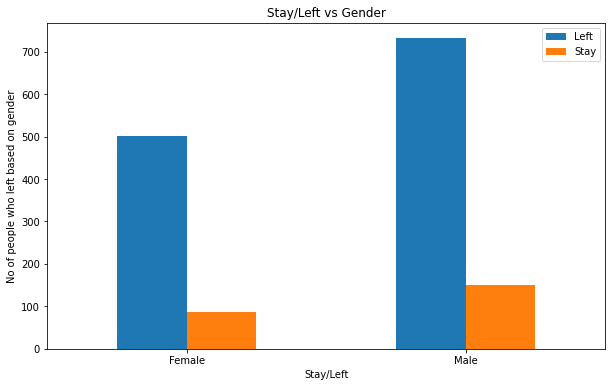

In [55]:
#Create a plot for crosstab

pd.crosstab(data_main['Gender'],data_main['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

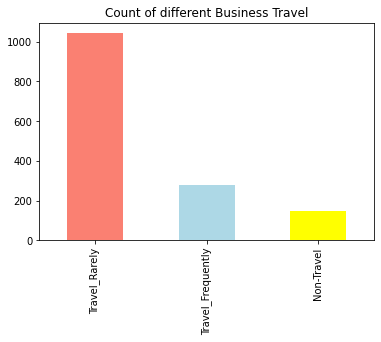

In [56]:
data_main['BusinessTravel'].value_counts().plot(kind='bar',color=['salmon','lightblue', 'yellow'],title="Count of different Business Travel")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

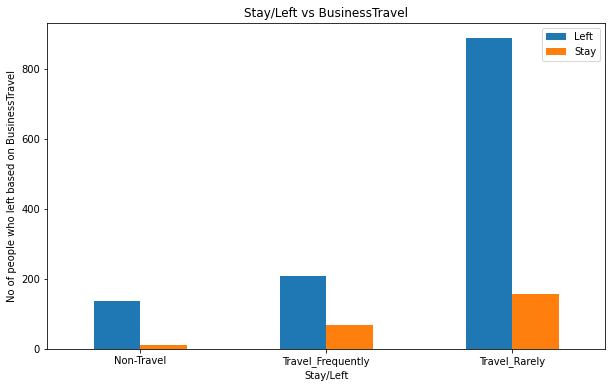

In [57]:
#Create a plot for crosstab

pd.crosstab(data_main['BusinessTravel'],data_main['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs BusinessTravel")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on BusinessTravel")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

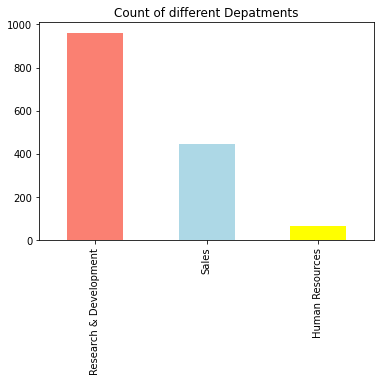

In [58]:
data_main['Department'].value_counts().plot(kind='bar',color=['salmon','lightblue', 'yellow'],title="Count of different Depatments")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

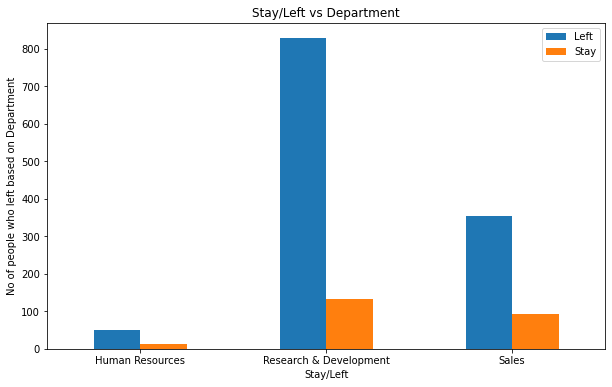

In [59]:
#Create a plot for crosstab

pd.crosstab(data_main['Department'],data_main['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Department")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on Department")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

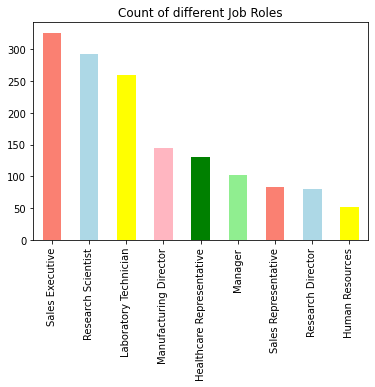

In [60]:
data_main['JobRole'].value_counts().plot(kind='bar',color=['salmon','lightblue','yellow', 'lightpink', 'green', 'lightgreen'],title="Count of different Job Roles")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

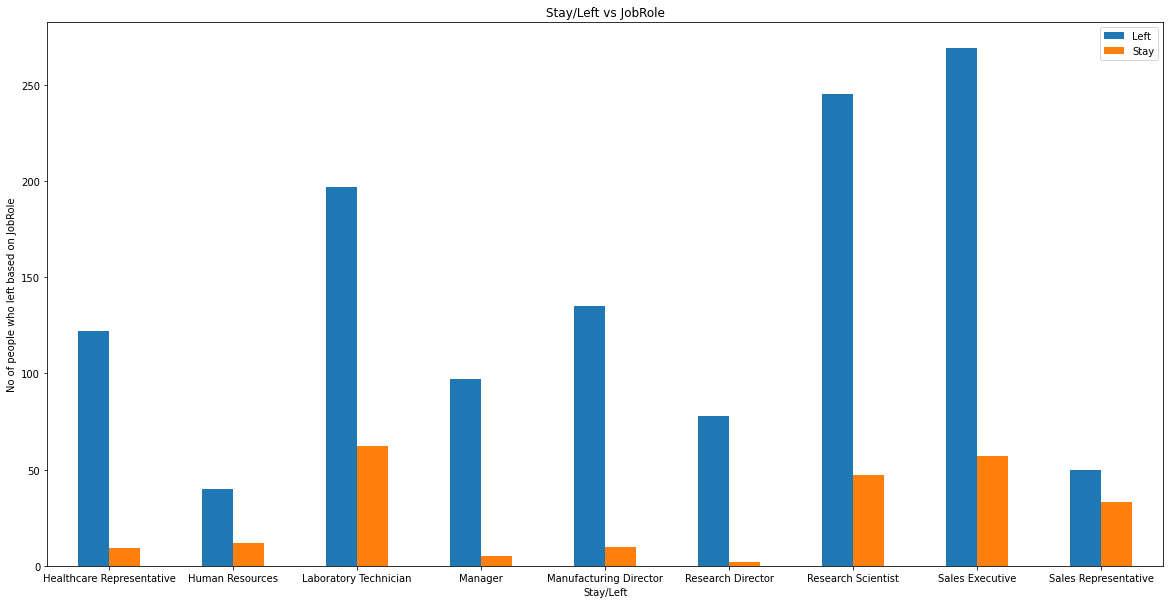

In [61]:
#Create a plot for crosstab

pd.crosstab(data_main['JobRole'],data_main['Attrition']).plot(kind="bar",figsize=(20,10))
plt.title("Stay/Left vs JobRole")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on JobRole")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

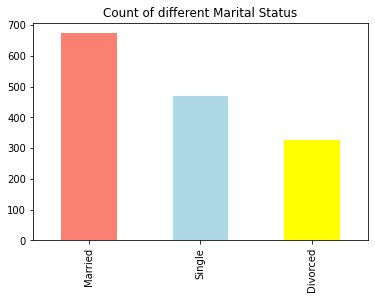

In [62]:
data_main['MaritalStatus'].value_counts().plot(kind='bar',color=['salmon','lightblue', 'yellow'],title="Count of different Marital Status")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

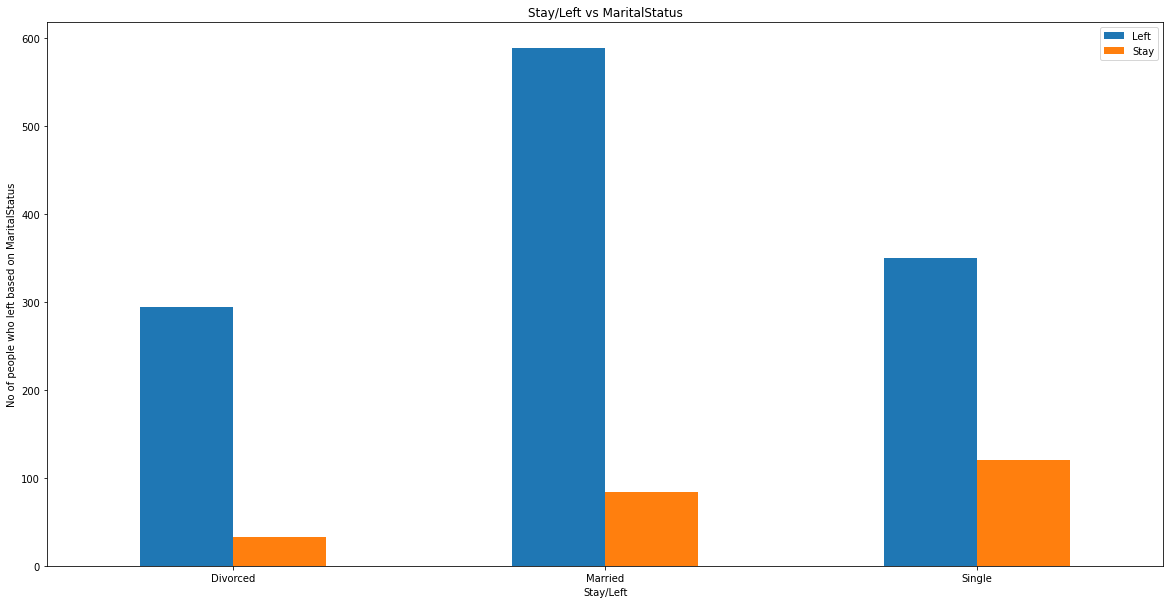

In [63]:
#Create a plot for crosstab

pd.crosstab(data_main['MaritalStatus'],data_main['Attrition']).plot(kind="bar",figsize=(20,10))
plt.title("Stay/Left vs MaritalStatus")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on MaritalStatus")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

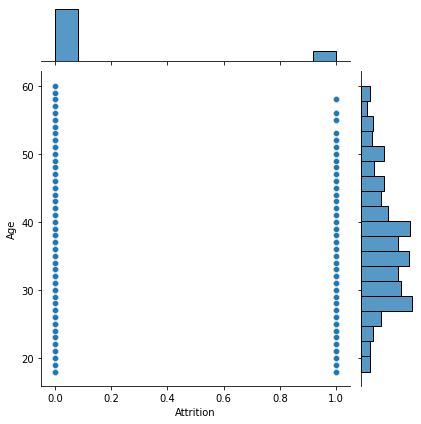

In [64]:
# Its Age vs stay/left
sns.jointplot(x = 'Attrition',y='Age',data=data_main)

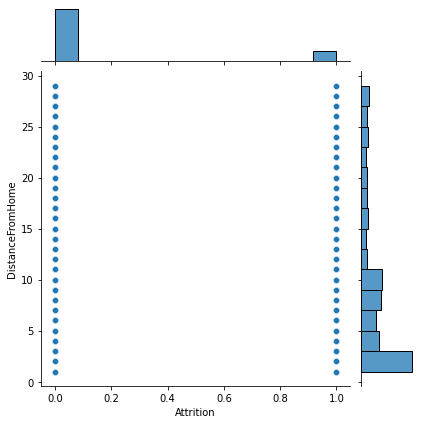

In [65]:
# Its DistanceFromHome vs stay/left
sns.jointplot(x = 'Attrition',y='DistanceFromHome',data=data_main)

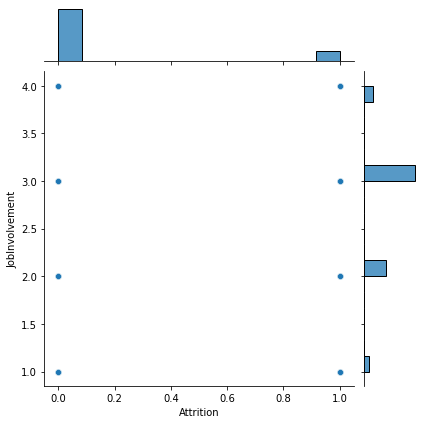

In [66]:
# Its JobInvolvement vs stay/left
sns.jointplot(x = 'Attrition',y='JobInvolvement',data=data_main)

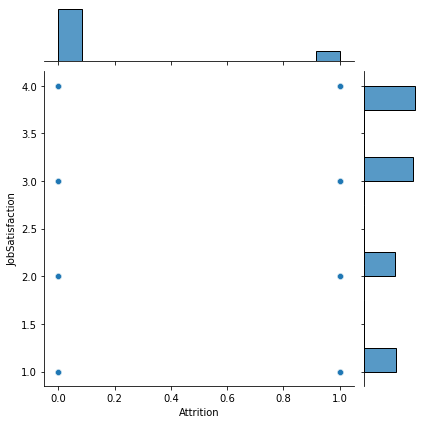

In [67]:
# Its JobSatisfaction vs stay/left
sns.jointplot(x = 'Attrition',y='JobSatisfaction',data=data_main)

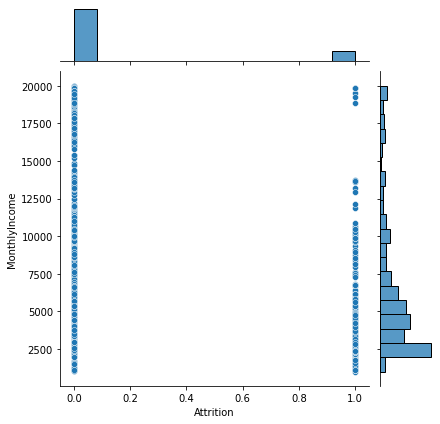

In [68]:
# Its MonthlyIncome vs stay/left
sns.jointplot(x = 'Attrition',y='MonthlyIncome',data=data_main)

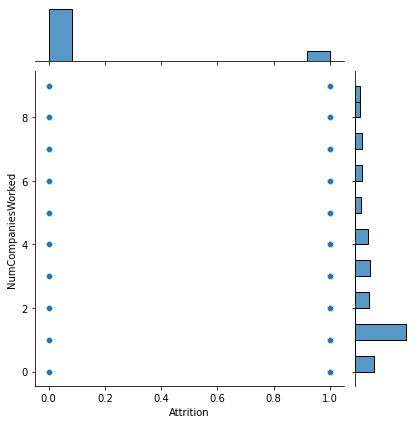

In [69]:
# Its NumCompaniesWorked vs stay/left
sns.jointplot(x = 'Attrition',y='NumCompaniesWorked',data=data_main)

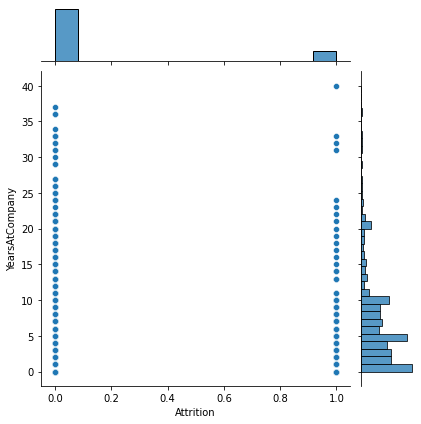

In [70]:
# Its YearsAtCompany vs stay/left
sns.jointplot(x = 'Attrition',y='YearsAtCompany',data=data_main)

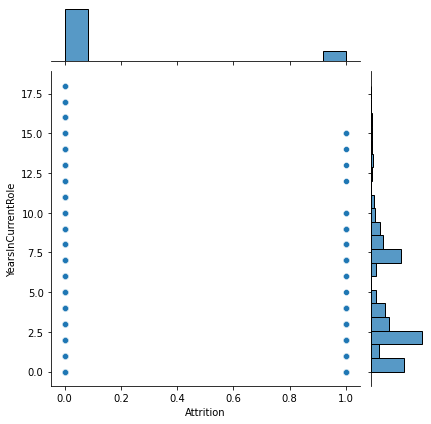

In [71]:
# Its YearsInCurrentRole vs stay/left
sns.jointplot(x = 'Attrition',y='YearsInCurrentRole',data=data_main)

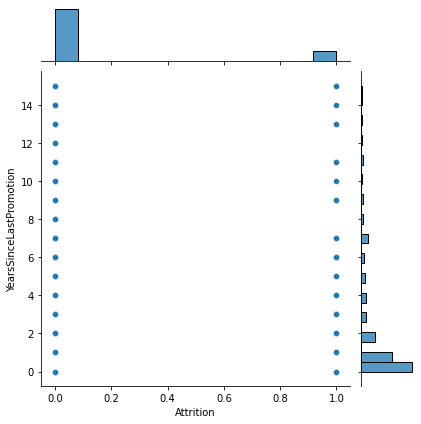

In [72]:
# Its YearsSinceLastPromotion vs stay/left
sns.jointplot(x = 'Attrition',y='YearsSinceLastPromotion',data=data_main)

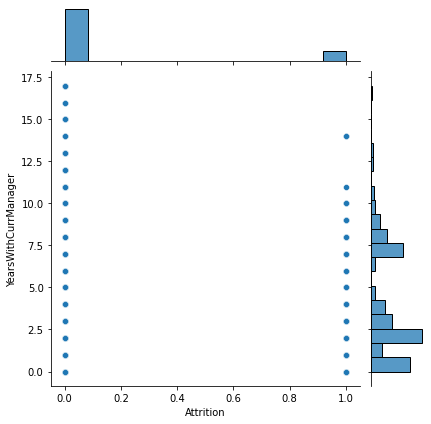

In [73]:
# Its YearsWithCurrManager vs stay/left
sns.jointplot(x = 'Attrition',y='YearsWithCurrManager',data=data_main)

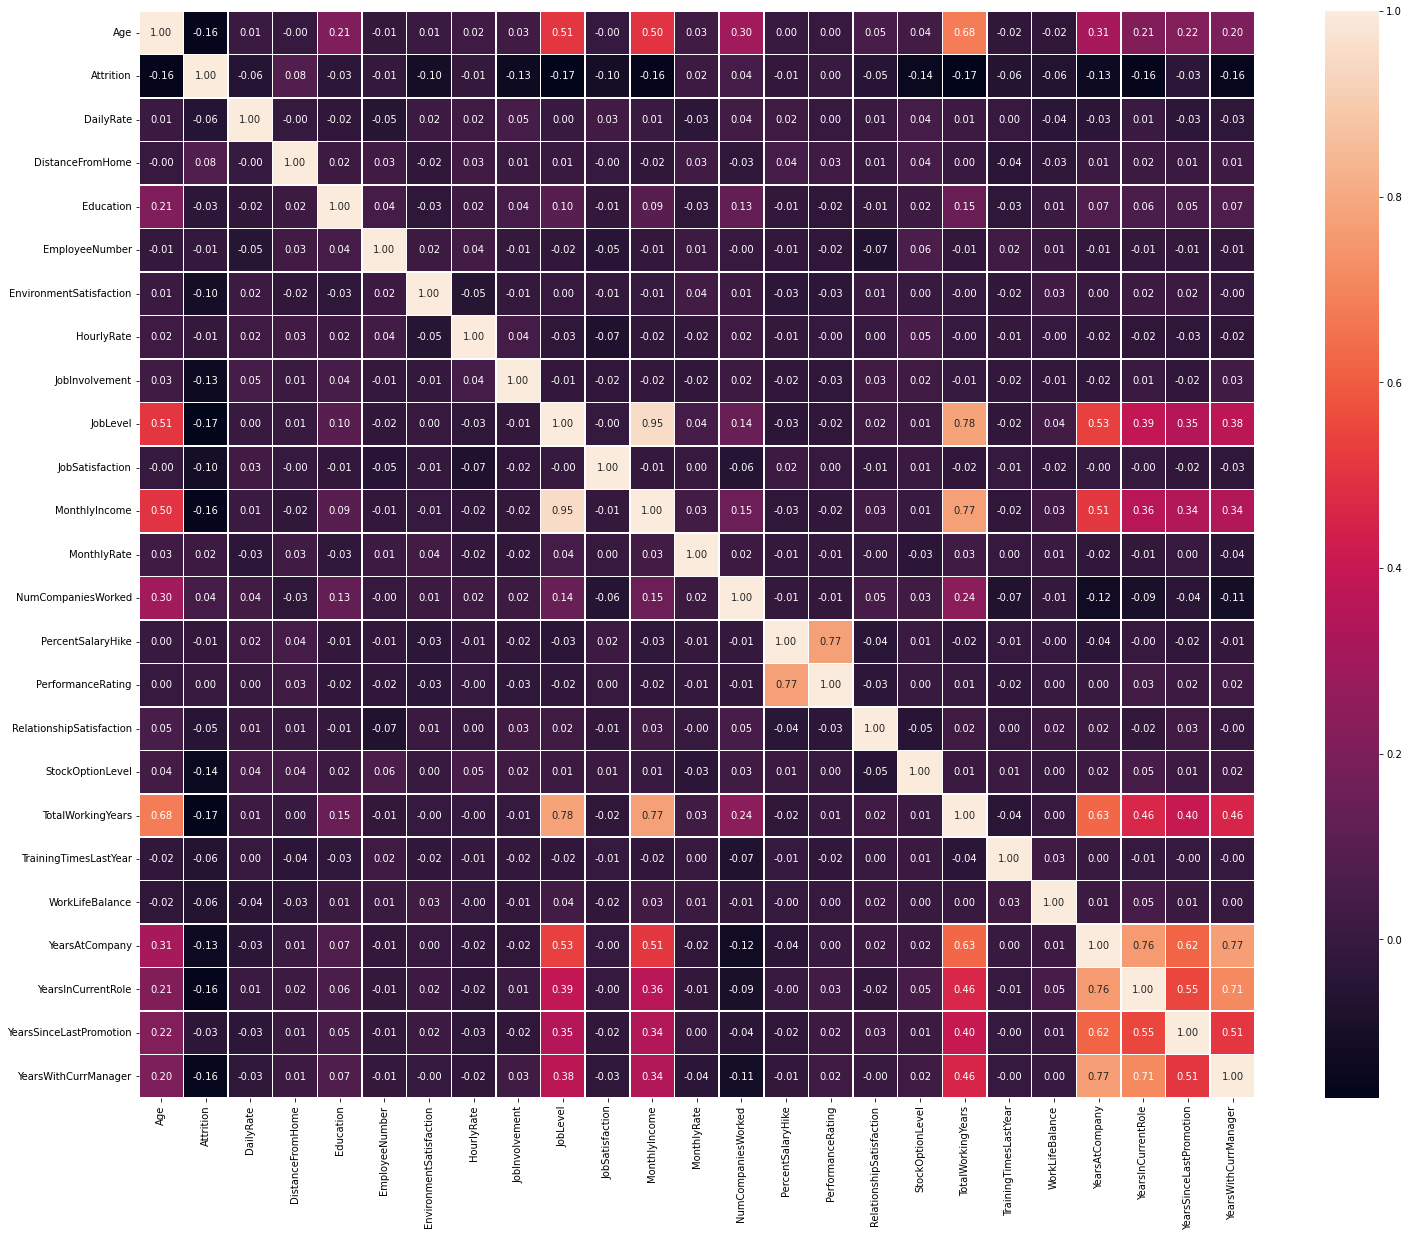

In [74]:
# Let's make our correlation matrix visual
corr_matrix=data_main.corr()
fig,ax=plt.subplots(figsize=(25,20))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [75]:
dataset = pd.get_dummies(data_main)
# from sklearn.preprocessing import OneHotEncoder
# oneh = OneHotEncoder(handle_unknown="ignore")
# features = data_main.columns
# oneh.fit(data_main[features])
dataset.head()
dataset.shape

(1470, 53)

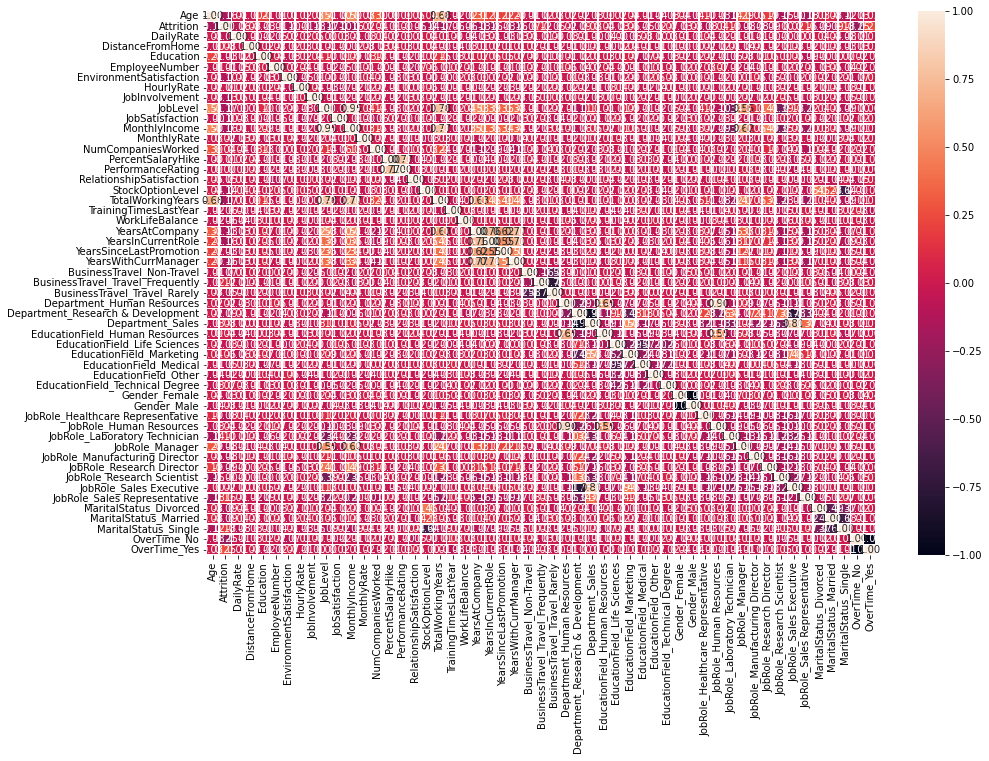

In [76]:
# Let's make our correlation matrix visual
corr_matrix=dataset.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [77]:
x=dataset.drop('Attrition',axis=1)
x.to_csv("processed HR.csv")
y=dataset.Attrition
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1316,43,1422,2,4,1849,1,92,3,2,4,...,0,0,0,1,0,0,1,0,1,0
909,19,265,25,3,1269,2,57,4,1,4,...,0,0,1,0,0,0,0,1,0,1
1453,36,1120,11,4,2045,2,100,2,2,4,...,0,0,0,1,0,0,1,0,1,0
1358,31,1079,10,2,1912,3,86,3,2,4,...,0,0,0,1,0,1,0,0,0,1
157,58,1145,9,3,214,2,75,2,1,2,...,0,0,1,0,0,0,1,0,0,1


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [79]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [80]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.873299
[Logistic Regression] test data accuracy is : 0.901361
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.785714
[KNN] training data accuracy is : 0.875000
[KNN] test data accuracy is : 0.812925
[SVM] training data accuracy is : 0.852891
[SVM] test data accuracy is : 0.867347
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.877551
[Naive Bayes] training data accuracy is : 0.776361
[Naive Bayes] test data accuracy is : 0.795918


In [81]:
model_scores={'Logistic Regression':lr.score(X_test,y_test)*100,
             'KNN classifier':knn.score(X_test,y_test)*100,
             'Support Vector Machine':svm.score(X_test,y_test)*100,
             'Random forest':rm.score(X_test,y_test)*100,
              'Decision tree':dt.score(X_test,y_test)*100,
              'Naive Bayes':gnb.score(X_test,y_test)*100
             }
model_scores

{'Logistic Regression': 90.1360544217687,
 'KNN classifier': 81.29251700680273,
 'Support Vector Machine': 86.73469387755102,
 'Random forest': 87.75510204081633,
 'Decision tree': 78.57142857142857,
 'Naive Bayes': 79.59183673469387}

In [82]:
from sklearn.metrics import classification_report
rm_y_preds = rm.predict(X_test)
print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       251
           1       0.82      0.21      0.33        43

    accuracy                           0.88       294
   macro avg       0.85      0.60      0.63       294
weighted avg       0.87      0.88      0.84       294



In [83]:
from sklearn.metrics import classification_report
lr_y_preds = lr.predict(X_test)
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       251
           1       1.00      0.33      0.49        43

    accuracy                           0.90       294
   macro avg       0.95      0.66      0.72       294
weighted avg       0.91      0.90      0.88       294



In [84]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,90.136054,81.292517,86.734694,87.755102,78.571429,79.591837


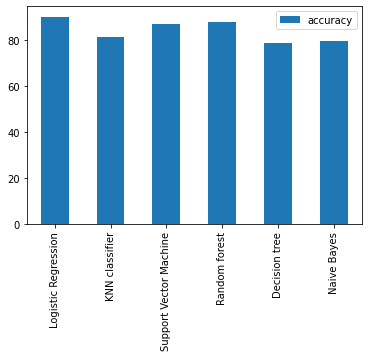

In [85]:
model_compare.T.plot(kind='bar')

**Feature** Importance

In [86]:
feature_dict=dict(zip(dataset.columns,list(lr.coef_[0])))
feature_dict

{'Age': -0.02135964324998413,
 'Attrition': -0.000153274474810569,
 'DailyRate': 0.027244330211972916,
 'DistanceFromHome': 0.0963863271918684,
 'Education': 1.4807706750634403e-05,
 'EmployeeNumber': -0.2508377269201606,
 'EnvironmentSatisfaction': 0.0057352654122705595,
 'HourlyRate': -0.17776566504242683,
 'JobInvolvement': 0.002619322567527472,
 'JobLevel': -0.2545940464833223,
 'JobSatisfaction': -8.239467138302082e-05,
 'MonthlyIncome': 1.7157758441179508e-05,
 'MonthlyRate': 0.1102757245268605,
 'NumCompaniesWorked': 0.0038475105739601174,
 'PercentSalaryHike': 0.3144285328402549,
 'PerformanceRating': -0.12847042858484256,
 'RelationshipSatisfaction': -0.22223634870929884,
 'StockOptionLevel': -0.029905985087783745,
 'TotalWorkingYears': -0.06881380396504246,
 'TrainingTimesLastYear': -0.04500059526614132,
 'WorkLifeBalance': 0.08455752387520796,
 'YearsAtCompany': -0.12975389240782415,
 'YearsInCurrentRole': 0.07667039468363908,
 'YearsSinceLastPromotion': -0.10048221509848486

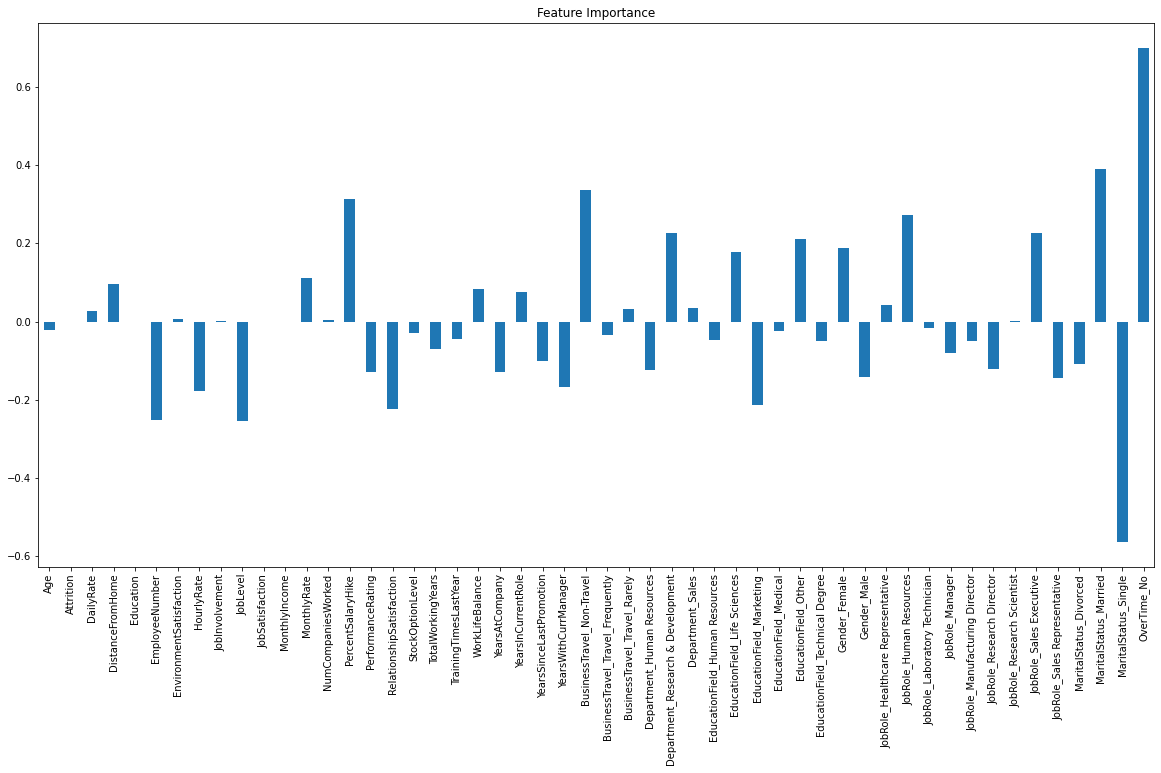

In [87]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",figsize=(20,10),legend=False,title="Feature Importance")
plt.savefig('importance.png', bbox_inches='tight', pad_inches = 0.0)

In [88]:
import pickle

# Save the trained model as a pickle string.
pickle.dump(lr, open('model.pkl', 'wb'))

# Load the pickled model
lr_from_pickle = pickle.load(open('model.pkl', 'rb'))

# Use the loaded pickled model to make predictions
lr_from_pickle.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])